In [1]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load bostan dataset from sklearn datasets
from sklearn.datasets import load_boston

In [3]:
# create dataframe from data
dfx = load_boston()
df = pd.DataFrame(dfx.data, columns=dfx.feature_names )
df['TARGET'] = dfx.target

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# check null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

# Find And Remove Outliers

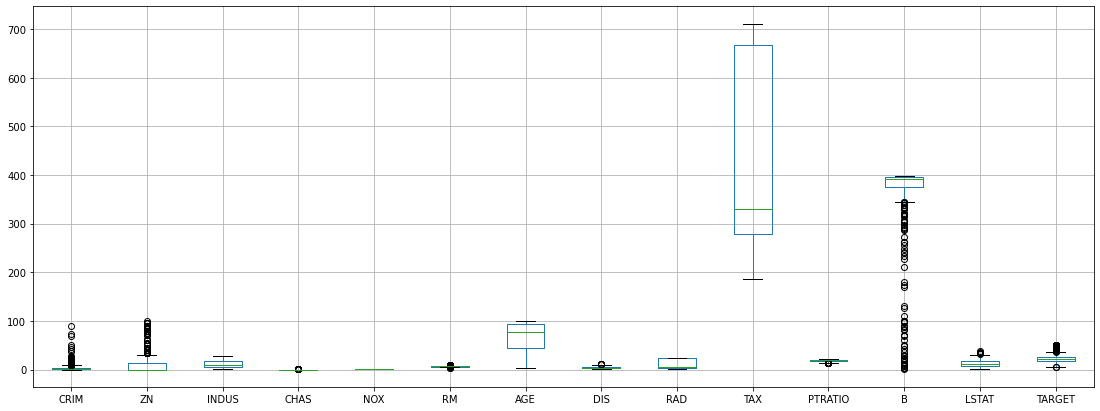

In [6]:
# find outliers by boxplot
plt.figure(figsize = (19,7))
df.boxplot()
plt.show()

**We Can See There Are Some Outliers Present In Our Dataset**

In [7]:
# Crim
first = df['CRIM'].quantile(0.25)
third = df['CRIM'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
df['CRIM'] = df['CRIM'].apply(lambda x: upper_limit if x > upper_limit else x)

# Zn
first = df['ZN'].quantile(0.25)
third = df['ZN'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
df['ZN'] = df['ZN'].apply(lambda x: upper_limit if x > upper_limit else x)

# Chas
first = df['CHAS'].quantile(0.25)
third = df['CHAS'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
df['CHAS'] = df['CHAS'].apply(lambda x: upper_limit if x > upper_limit else x)

# Rm
first = df['RM'].quantile(0.25)
third = df['RM'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
df['RM'] = df['RM'].apply(lambda x: upper_limit if x > upper_limit else x)
df['RM'] = df['RM'].apply(lambda x: lower_limit if x < lower_limit else x)


# Dis
first = df['DIS'].quantile(0.25)
third = df['DIS'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
df['DIS'] = df['DIS'].apply(lambda x: upper_limit if x > upper_limit else x)

# Ptration
first = df['PTRATIO'].quantile(0.25)
third = df['PTRATIO'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
df['PTRATIO'] = df['PTRATIO'].apply(lambda x: lower_limit if x < lower_limit else x)

# B
first = df['B'].quantile(0.25)
third = df['B'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
df['B'] = df['B'].apply(lambda x: lower_limit if x < lower_limit else x)

# Lstat
first = df['LSTAT'].quantile(0.25)
third = df['LSTAT'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
df['LSTAT'] = df['LSTAT'].apply(lambda x: upper_limit if x > upper_limit else x)

# Target
first = df['TARGET'].quantile(0.25)
third = df['TARGET'].quantile(0.75)
iqr = third - first
lower_limit = first - 1.5 * iqr
upper_limit = third + 1.5 * iqr
df['TARGET'] = df['TARGET'].apply(lambda x: upper_limit if x > upper_limit else x)
df['TARGET'] = df['TARGET'].apply(lambda x: lower_limit if x < lower_limit else x)

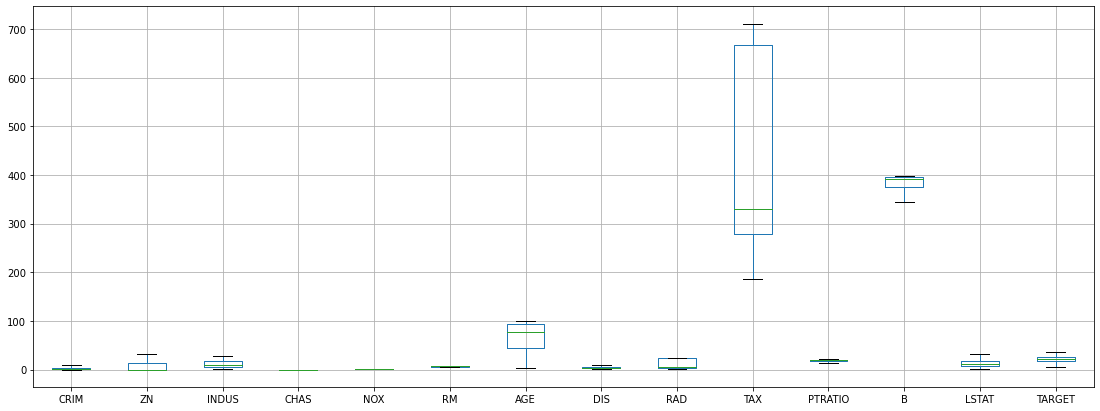

In [8]:
# check outliers after caping
plt.figure(figsize = (19,7))
df.boxplot()
plt.show()

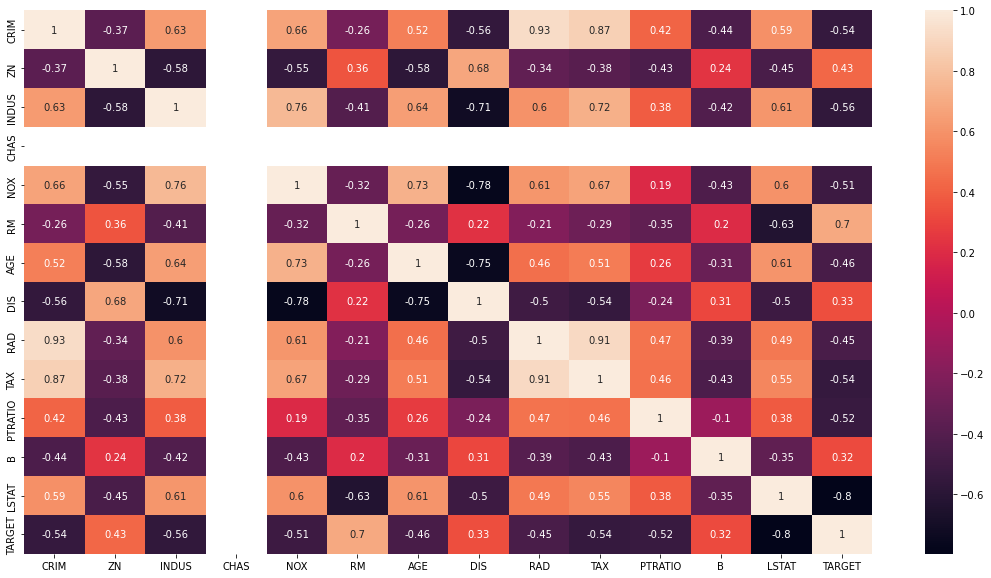

In [19]:
# check correlation of data
plt.figure(figsize = (19,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Split Data

In [9]:
# split features and target
X = df.drop('TARGET', axis= 1)
y = df['TARGET']

In [10]:
# split train and test data by train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [11]:
# prediction by linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [13]:
lr.intercept_

36.63084060697628

In [14]:
lr.coef_

array([-5.66661163e-01,  5.76549054e-02, -3.91862352e-03,  5.98965322e-14,
       -1.56940664e+01,  2.55474263e+00, -1.73654942e-03, -1.22426993e+00,
        3.07947140e-01, -8.22699225e-03, -8.23313920e-01,  1.50816486e-02,
       -5.24889082e-01])

**predicted score formula = **
**(predicted score = coef * features + intercept)**

In [12]:
# check accuracy of our model by r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7665797857938926

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

13.254147195311992

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


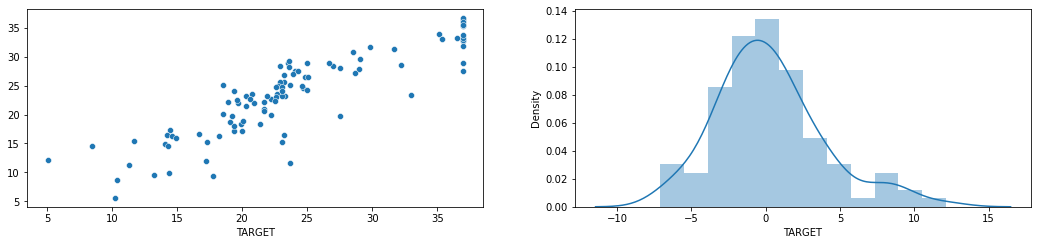

In [33]:
# check difference between actual and predicted data
plt.figure(figsize = (18,8))
plt.subplot(2,2,1)
sns.scatterplot(y_test,y_pred)

plt.subplot(2,2,2)
sns.distplot(y_test-y_pred)
plt.show()